#Dự đoán giá trị cảm xúc theo 2 biến độc lập là điểm cảm xúc của waering a mask, và điểm cảm xúc của giãn cách xã hội.
#Xem xét xem điểm cảm xúc chugn của Canada có phụ thuộc vào 2 giá trị này không

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Lấy dữ liệu
df = pd.read_csv('data.csv')
mask = np.array(df['mask'])
distancing = np.array(df['distancing'])
evi = np.array(df['evi'])

In [4]:
def model_func(x, c1, c2):
    mask, distancing = x
    return c1 * np.exp(-(mask + distancing) * c2)

# Fit dữ liệu với mô hình
popt, pcov = curve_fit(model_func, (mask, distancing), evi)

# Tính giá trị dữ đoán từ mô hình phù hợp
predicted_evi = model_func((mask, distancing), *popt)



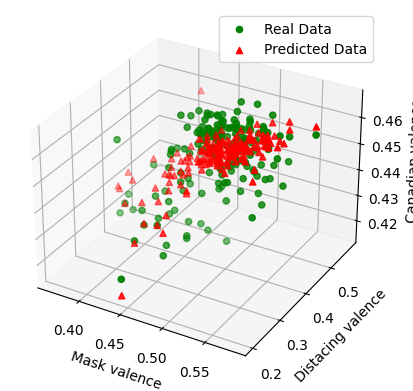

Constant B0 = 0.3463, Constant B1 = -0.2812


In [5]:
# Vẽ đồ thị 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vẽ dữ liệu thực tế
ax.scatter(mask, distancing, evi, c='g', marker='o', label='Real Data')

# Vẽ dữ liệu dữ đoán từ mô hình
ax.scatter(mask, distancing, predicted_evi, c='red', marker='^', label='Predicted Data')
ax.set_xlabel('Mask valence')
ax.set_ylabel('Distacing valence')
ax.set_zlabel('Canadian valence')
plt.legend()
plt.show()

c1_opt, c2_opt = popt
print(f'Constant B0 = {c1_opt:.4f}, Constant B1 = {c2_opt:.4f}')

In [6]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((evi - predicted_evi)**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(evi - predicted_evi)/np.abs(evi))*100

print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(evi - predicted_evi))
print('Testing MAE:', test_mae)

Testing RMSE: 0.008900293966718594
Testing MAPE: 1.5527350959429036
Testing MAE: 0.006913535698047935


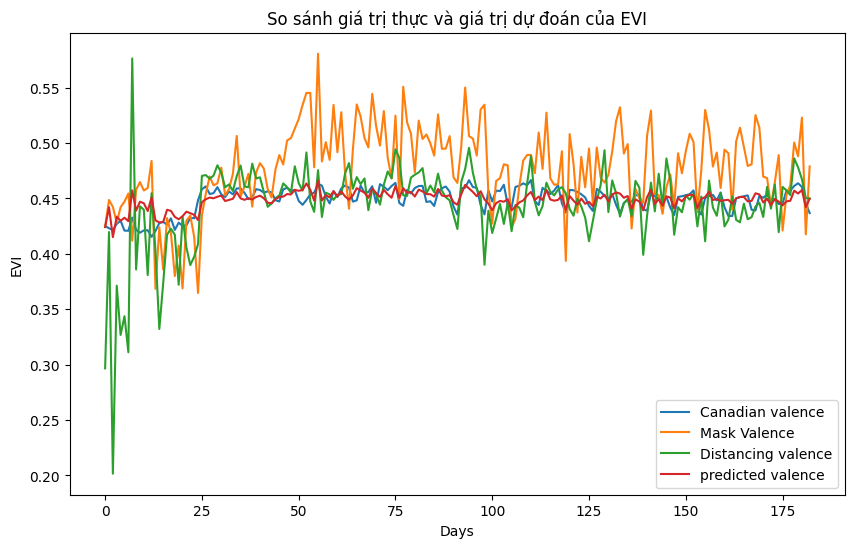

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(evi, label='Canadian valence')
plt.plot(mask, label='Mask Valence')
plt.plot(distancing, label='Distancing valence')
plt.plot(predicted_evi, label='predicted valence')


plt.xlabel('Days')
plt.ylabel('EVI')
plt.title('So sánh giá trị thực và giá trị dự đoán của EVI')
plt.legend()
plt.show()

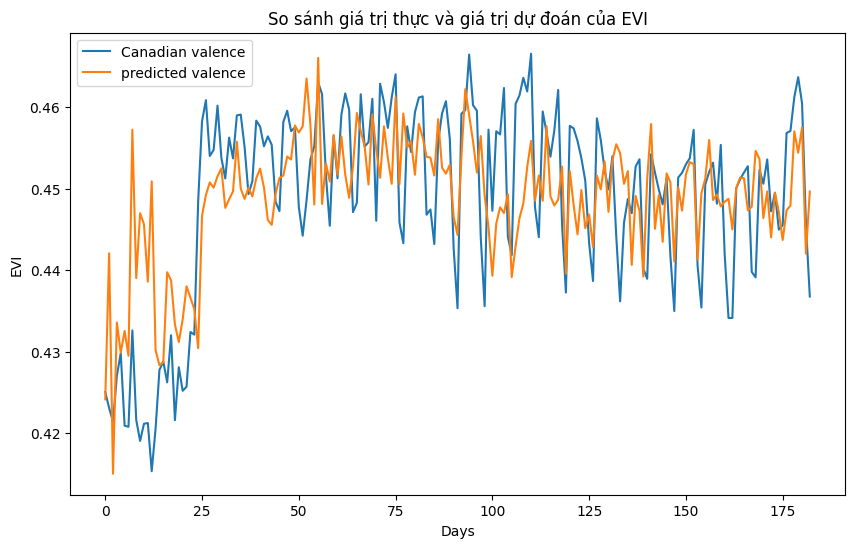

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(evi, label='Canadian valence')
plt.plot(predicted_evi, label='predicted valence')
plt.xlabel('Days')
plt.ylabel('EVI')
plt.title('So sánh giá trị thực và giá trị dự đoán của EVI')
plt.legend()
plt.show()